## Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

## Functions

In [2]:
#     Features:(n_examples, n_features)
#     Labels: (n_examples, 1)
#     Weights:(n_features, 1)


# -- Sigmoid function -- #
def sigmoid(z):
    final_label = 1/(1+np.exp(-z))
    return final_label

# -- Predictor function -- #
def predict(features, weights):
    '''
    Returns probabilities
    of class label
    '''
    z = np.dot(features, weights)
    return sigmoid(z)

# -- Cost function -- #
def cost_function(features, labels, weights):
    '''    
    Write down the average cross-entropy loss
    '''
    observations = len(labels)
    #print("number",observations)

    predictions = predict(features, weights)

    # You may use this format or define in your own way
    # Note: This is for binary cros-entropy loss.
    
    # We can divide the binary cross entropy loss into two parts
    # One for p(y=1) and another for p(y=0)

    # Take the error when label=1
    class1_cost = np.dot(labels, np.log(predictions))

    # Take the error when label=0
    class2_cost = np.dot(1-labels, np.log(1-predictions))
    
    # Take the sum of both costs
    cost = class1_cost + class2_cost

    # Take the average cost
    cost = -cost/observations

    return cost


def update_weights(features, labels, weights, lr):
    '''
   Gradient Descent
    '''
    N = features.shape[1]

    #1 - Get Predictions
    predictions = predict(features,weights)
    
    # Write down the gradient of the cost
    gradient = np.dot((predictions-labels), features)

    # 3 Take the average cost derivative for each feature
    gradient /= N

    # 4 Update the weights using the learning rate lr
    weights = weights - (lr*gradient)

    return weights

def decision_boundary(prob):
    return 1 if prob >= .5 else 0 # You may change the threshold from 0.5 

def train(features, labels, weights, lr, iters):
    cost_history = [np.float64('inf')]

    for i in range(iters):
        weights = update_weights(features, labels, weights, lr)

        #Calculate error for auditing purposes
        cost = cost_function(features, labels, weights)
        
        cost_history.append(cost)

        print("iter: "+str(i) + " cost: "+str(cost))

    return weights, cost_history

def accuracy(predicted_labels, actual_labels):
    diff = predicted_labels - actual_labels
    return 1.0 - (float(np.count_nonzero(diff)) / len(diff))

## Data

In [3]:
data = pd.read_csv("C:/Users/udvas/Downloads/archive/breast-cancer.csv")
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [4]:
data.dropna
print(data.shape)

(569, 32)


In [5]:
X =data.iloc[:,2:]
x = StandardScaler().fit_transform(X)
y = data["diagnosis"]
y.replace(["M","B"],[1,0],inplace=True)

In [6]:
# Train Test Split
x_train,x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [7]:
x.shape

(569, 30)

In [8]:
# Initialize the weights
wts = np.zeros(X.shape[1])

# Training
optimal_wts, loss = train(x_train, y_train, wts, 1e-5, 1000)

iter: 0 cost: 0.6928467178934623
iter: 1 cost: 0.692546544744333
iter: 2 cost: 0.6922466608270762
iter: 3 cost: 0.6919470658561847
iter: 4 cost: 0.6916477595461268
iter: 5 cost: 0.6913487416113471
iter: 6 cost: 0.6910500117662683
iter: 7 cost: 0.690751569725293
iter: 8 cost: 0.690453415202804
iter: 9 cost: 0.6901555479131666
iter: 10 cost: 0.6898579675707299
iter: 11 cost: 0.689560673889828
iter: 12 cost: 0.6892636665847813
iter: 13 cost: 0.688966945369898
iter: 14 cost: 0.6886705099594754
iter: 15 cost: 0.6883743600678017
iter: 16 cost: 0.6880784954091568
iter: 17 cost: 0.6877829156978144
iter: 18 cost: 0.6874876206480416
iter: 19 cost: 0.6871926099741031
iter: 20 cost: 0.6868978833902604
iter: 21 cost: 0.6866034406107737
iter: 22 cost: 0.6863092813499034
iter: 23 cost: 0.6860154053219119
iter: 24 cost: 0.6857218122410637
iter: 25 cost: 0.6854285018216282
iter: 26 cost: 0.68513547377788
iter: 27 cost: 0.684842727824101
iter: 28 cost: 0.6845502636745813
iter: 29 cost: 0.684258081043620

iter: 258 cost: 0.6241904976732687
iter: 259 cost: 0.6239556363055616
iter: 260 cost: 0.6237209930910017
iter: 261 cost: 0.6234865677748775
iter: 262 cost: 0.6232523601026985
iter: 263 cost: 0.6230183698201958
iter: 264 cost: 0.6227845966733234
iter: 265 cost: 0.622551040408257
iter: 266 cost: 0.6223177007713957
iter: 267 cost: 0.6220845775093616
iter: 268 cost: 0.6218516703690011
iter: 269 cost: 0.6216189790973841
iter: 270 cost: 0.6213865034418059
iter: 271 cost: 0.6211542431497864
iter: 272 cost: 0.6209221979690711
iter: 273 cost: 0.6206903676476314
iter: 274 cost: 0.6204587519336647
iter: 275 cost: 0.6202273505755954
iter: 276 cost: 0.6199961633220747
iter: 277 cost: 0.6197651899219815
iter: 278 cost: 0.619534430124422
iter: 279 cost: 0.6193038836787315
iter: 280 cost: 0.619073550334473
iter: 281 cost: 0.6188434298414388
iter: 282 cost: 0.6186135219496508
iter: 283 cost: 0.6183838264093601
iter: 284 cost: 0.6181543429710484
iter: 285 cost: 0.6179250713854273
iter: 286 cost: 0.61769

iter: 508 cost: 0.5716473323839094
iter: 509 cost: 0.571459695181501
iter: 510 cost: 0.5712722199714145
iter: 511 cost: 0.5710849065601836
iter: 512 cost: 0.5708977547545856
iter: 513 cost: 0.5707107643616427
iter: 514 cost: 0.5705239351886207
iter: 515 cost: 0.5703372670430301
iter: 516 cost: 0.5701507597326246
iter: 517 cost: 0.5699644130654024
iter: 518 cost: 0.5697782268496042
iter: 519 cost: 0.5695922008937153
iter: 520 cost: 0.5694063350064633
iter: 521 cost: 0.5692206289968195
iter: 522 cost: 0.5690350826739977
iter: 523 cost: 0.5688496958474548
iter: 524 cost: 0.5686644683268904
iter: 525 cost: 0.5684793999222464
iter: 526 cost: 0.568294490443707
iter: 527 cost: 0.5681097397016983
iter: 528 cost: 0.5679251475068895
iter: 529 cost: 0.5677407136701901
iter: 530 cost: 0.5675564380027524
iter: 531 cost: 0.5673723203159695
iter: 532 cost: 0.5671883604214765
iter: 533 cost: 0.5670045581311491
iter: 534 cost: 0.5668209132571042
iter: 535 cost: 0.5666374256116998
iter: 536 cost: 0.5664

iter: 776 cost: 0.5265919362629697
iter: 777 cost: 0.5264415271225854
iter: 778 cost: 0.5262912362518248
iter: 779 cost: 0.5261410635153774
iter: 780 cost: 0.5259910087781174
iter: 781 cost: 0.525841071905105
iter: 782 cost: 0.5256912527615842
iter: 783 cost: 0.5255415512129836
iter: 784 cost: 0.5253919671249166
iter: 785 cost: 0.5252425003631801
iter: 786 cost: 0.5250931507937547
iter: 787 cost: 0.5249439182828048
iter: 788 cost: 0.5247948026966781
iter: 789 cost: 0.5246458039019051
iter: 790 cost: 0.5244969217651988
iter: 791 cost: 0.5243481561534556
iter: 792 cost: 0.5241995069337534
iter: 793 cost: 0.5240509739733524
iter: 794 cost: 0.5239025571396947
iter: 795 cost: 0.5237542563004037
iter: 796 cost: 0.5236060713232844
iter: 797 cost: 0.5234580020763229
iter: 798 cost: 0.5233100484276857
iter: 799 cost: 0.5231622102457204
iter: 800 cost: 0.5230144873989545
iter: 801 cost: 0.5228668797560958
iter: 802 cost: 0.5227193871860324
iter: 803 cost: 0.522572009557831
iter: 804 cost: 0.5224

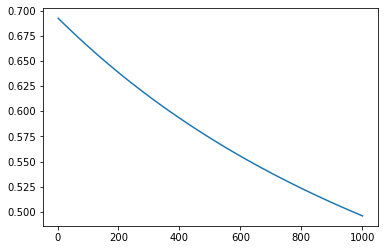

In [9]:
# Plot the loss against the number of epochs
plt.plot(np.arange(1, len(loss)+1, 1), loss)
plt.show()

In [10]:
predictions = []
for elem in predict(x_test, optimal_wts):
    predictions.append(decision_boundary(elem))

In [11]:
train_predictions = []
for i in predict(x_train, optimal_wts):
    train_predictions.append(decision_boundary(i))
test_predictions = []
for i in predict(x_test, optimal_wts):
    test_predictions.append(decision_boundary(i))

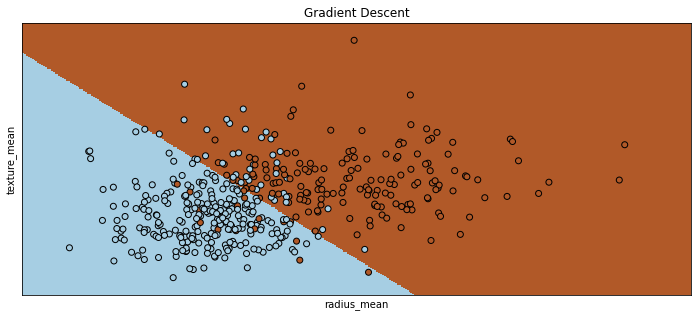

In [19]:
# # Plot the decision boundary for two features. For that, we will assign a color to each
# # point in the mesh [x_min, x_max]x[y_min, y_max].
x_min, x_max = x.T[0].min() - 0.5, x.T[0].max() + 0.5
y_min, y_max = x.T[1].min() - 0.5, x.T[1].max() + 0.5
h = 0.02  # step size in the mesh
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
probs = predict(np.c_[xx.ravel(), yy.ravel()], optimal_wts[[0,1]])
mesh_preds = []
for elem in probs:
    mesh_preds.append(decision_boundary(elem))
Z = np.array(mesh_preds)
# # Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1, figsize=(12, 5))
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired,shading="auto")

# # Plot also the training points

plt.scatter(x_train.T[0], x_train.T[1],c=y_train, edgecolors="k", cmap=plt.cm.Paired)
plt.xlabel("radius_mean")
plt.ylabel("texture_mean")
plt.title('Gradient Descent')
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks(())
plt.yticks(())

plt.show()

In [20]:
# Accuracy
print("Accuracy using gradient descent: {}".format(accuracy(test_predictions,y_test)))

Accuracy using gradient descent: 0.956140350877193


## Scikit-Learn module

In [14]:
from sklearn.linear_model import LogisticRegression

In [15]:
# L-BFGS
clf_lbfgs = LogisticRegression(solver='lbfgs').fit(x_train, y_train)

# Newton-CG
clf_newt = LogisticRegression(solver="newton-cg").fit(x_train, y_train)

In [16]:
pred_lbfgs = clf_lbfgs.predict(x_test)
pred_newt = clf_newt.predict(x_test)

In [18]:
# Accuracy
print("Accuracy using L-BFGS: {}".format(accuracy(pred_lbfgs,y_test)))
print('\n')
print("Accuracy using Newton-CG: {}".format(accuracy(pred_newt,y_test)))

Accuracy using L-BFGS: 1.0


Accuracy using Newton-CG: 1.0


# If we consider more than two feature vectors while training, then the code for decision boundary will not work. Because, it will try to find 30 predictors while predicting also.So, to make it work we need to choose any two covariate from the dataset and then train the model. Then, the decision boundary code will work like previous.